In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#EDA

In [3]:
df=pd.read_csv("ford (1).csv")

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.duplicated().sum()

154

In [7]:
df.shape

(17966, 9)

In [8]:
df.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [9]:
df["model"].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [10]:
df["fuelType"].value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [11]:

df["transmission"].value_counts()

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [12]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


<Axes: xlabel='price', ylabel='Count'>

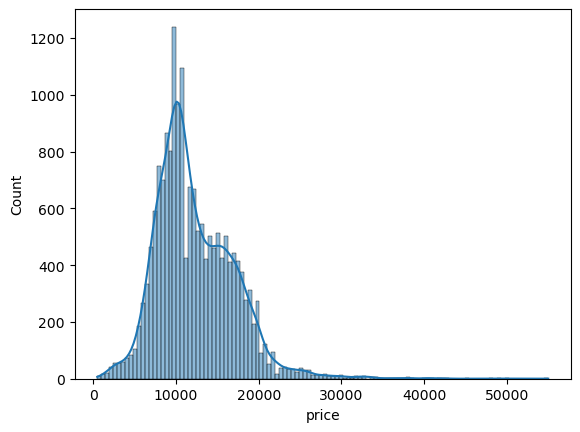

In [13]:
sns.histplot(df["price"],kde=True)

<Axes: >

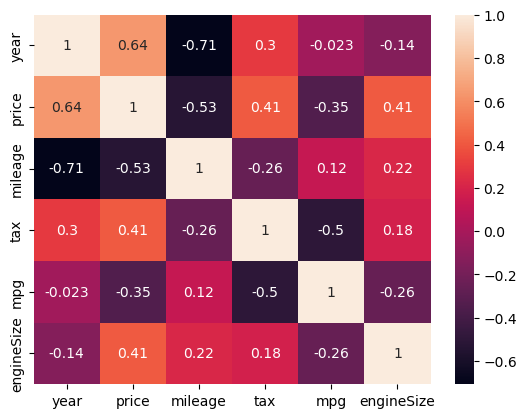

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='price', ylabel='model'>

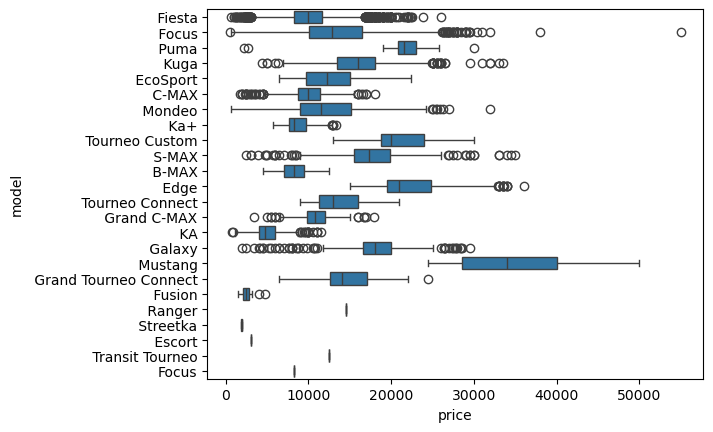

In [15]:
sns.boxplot(x = df['price'],y =df['model'])

<Axes: xlabel='year', ylabel='price'>

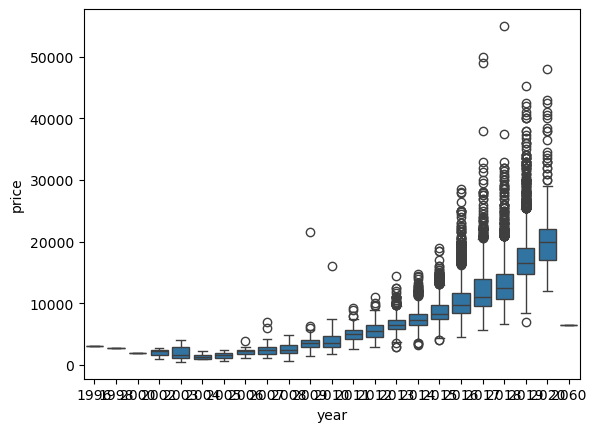

In [16]:
sns.boxplot(data = df,x = 'year',y = 'price')

In [17]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [18]:
# from sklearn.preprocessing import LabelEncoder

# col=["model","transmission","fuelType"]
# for col in col:
#     le=LabelEncoder()
#     df[col]=le.fit_transform(df[col])


In [19]:
df = pd.get_dummies(df, columns=["model"], drop_first=True)
df=pd.get_dummies(df,columns=["transmission"],drop_first=True)
df=pd.get_dummies(df,columns=["fuelType"],drop_first=True)

df=df.astype(int)


In [20]:
x=df.drop("price",axis=1)
y=df["price"]

In [21]:
x

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()

In [27]:
model.fit(x_train_scaler,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test_scaler)
result=[]

In [29]:
y_pred

array([ 7010.99036987,  9377.09339219,  9561.77198568, ...,
       28801.44087428,  9803.32839561, 15149.6483431 ])

In [30]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int32

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2=r2_score(y_test,y_pred)
r2

0.8475692067278334

In [33]:
n=x_test.shape[0]
p=x_test.shape[1]

In [34]:

adj_r2=1-((1-r2)*(n-1))/(n-p-1)
adj_r2

0.8461129979694031

In [36]:
result.append({
    "name":"Linear Regression",
    "r2 score": r2,
    "adj_r2":adj_r2
})

In [38]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train_scaler,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
xg_pred=xg.predict(x_test_scaler)

In [44]:
r2=r2_score(y_test,xg_pred)
r2

0.6981448531150818

In [48]:
n=x_test.shape[0]
p=x_test.shape[1]

In [50]:
adj_r2=1-((1-r2)*(n-1))/(n-p-1)
adj_r2

0.6952611568537479

In [52]:
result.append({
    "name":"XG Boost Regression",
    "r2 score":r2,
    "adj_r2":adj_r2
})

In [70]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
ada=AdaBoostRegressor()
gra=GradientBoostingRegressor()
ada.fit(x_train_scaler,y_train)


AdaBoostRegressor()

In [71]:
y_pred=ada.predict(x_test_scaler)

In [74]:
r2=r2_score(y_test,xg_pred)
r2
n=x_test.shape[0]
p=x_test.shape[1]

In [76]:
adj_r2=1-((1-r2)*(n-1))/(n-p-1)
adj_r2

0.6952611568537479

In [78]:
result.append({
    "name":"Ada Boost Regression",
    "r2 score":r2,
    "adj_r2":adj_r2
})

In [80]:
result

[{'name': 'Linear Regression',
  'r2 score': 0.8475692067278334,
  'adj_r2': 0.8461129979694031},
 {'name': 'XG Boost Regression',
  'r2 score': 0.6981448531150818,
  'adj_r2': 0.6952611568537479},
 {'name': 'Ada Boost Regression',
  'r2 score': 0.6981448531150818,
  'adj_r2': 0.6952611568537479},
 {'name': 'Ada Boost Regression',
  'r2 score': 0.6981448531150818,
  'adj_r2': 0.6952611568537479}]

In [82]:
gra.fit(x_train_scaler,y_train)

GradientBoostingRegressor()

In [84]:
y_pred=gra.predict(x_test_scaler)

In [88]:
r2=r2_score(y_test,xg_pred)
r2
n=x_test.shape[0]
p=x_test.shape[1]

In [90]:
adj_r2=1-((1-r2)*(n-1))/(n-p-1)
adj_r2

0.6952611568537479

In [92]:
result.append({
    "name":"Ada Boost Regression",
    "r2 score":r2,
    "adj_r2":adj_r2
})

In [94]:
pd.DataFrame(result)

,name,r2 score,adj_r2
0,Linear Regression,0.847569,0.846113
1,XG Boost Regression,0.698145,0.695261
2,Ada Boost Regression,0.698145,0.695261
3,Ada Boost Regression,0.698145,0.695261
4,Ada Boost Regression,0.698145,0.695261


In [96]:
import joblib
joblib.dump(model,"model.pkl")

['model.pkl']

In [98]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [100]:
joblib.dump(x.columns.tolist(),"columns.pkl")

['columns.pkl']

In [102]:
x.columns.tolist()

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'model_ C-MAX',
 'model_ EcoSport',
 'model_ Edge',
 'model_ Escort',
 'model_ Fiesta',
 'model_ Focus',
 'model_ Fusion',
 'model_ Galaxy',
 'model_ Grand C-MAX',
 'model_ Grand Tourneo Connect',
 'model_ KA',
 'model_ Ka+',
 'model_ Kuga',
 'model_ Mondeo',
 'model_ Mustang',
 'model_ Puma',
 'model_ Ranger',
 'model_ S-MAX',
 'model_ Streetka',
 'model_ Tourneo Connect',
 'model_ Tourneo Custom',
 'model_ Transit Tourneo',
 'model_Focus',
 'transmission_Manual',
 'transmission_Semi-Auto',
 'fuelType_Electric',
 'fuelType_Hybrid',
 'fuelType_Other',
 'fuelType_Petrol']